# Simple Pendulum

> A pendulum is a weight suspended from a so that it can swing freely. When a pendulum is displaced sideways from its resting, equilibrium position, it is subject to a restoring force due to gravity that will accelerate it back toward the equilibrium position.

[From Wikipedia](https://en.wikipedia.org/wiki/Pendulum)

## Setup

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from math import sin, cos

In [53]:
def feval(funcName, *args):
    return eval(funcName)(*args)

## Functions

In [74]:
def springMassDamper(t, x):
    dx = np.zeros((len(x)))
        
    
    d_x = x[1]
    
    dx[0]= d_x
    dx[1] = -k*x[0]/m
    
    return dx

In [49]:
def simplePendulumFriction(t,x):
    dx = np.zeros((len(x)))

    theta = x[0]
    d_theta = x[1]
    
    dx[0]= d_theta
    dx[1] = -(g/l)*sin(x[0]) - (k/m)*x[1]
    
    return dx

## Initial Conditions

In [75]:
x0 = np.array([1.0,1.0])
g = 9.81
l = 1
m = 1
k = 1
a = 1
w = np.sqrt(k/m)

t = np.arange(0.0, 10.0, 0.01)
s = a * np.sin(w * t)
ds = a * w * np.cos(w*t)

## Solve the system numerically

In [76]:
tempSol = integrate.solve_ivp(springMassDamper,[0,10],x0, max_step=0.05)
#tempSol2 = integrate.solve_ivp(simplePendulumFriction,[0,10],x0, max_step=0.05)

## Plot your results

### Spring Mass Damper

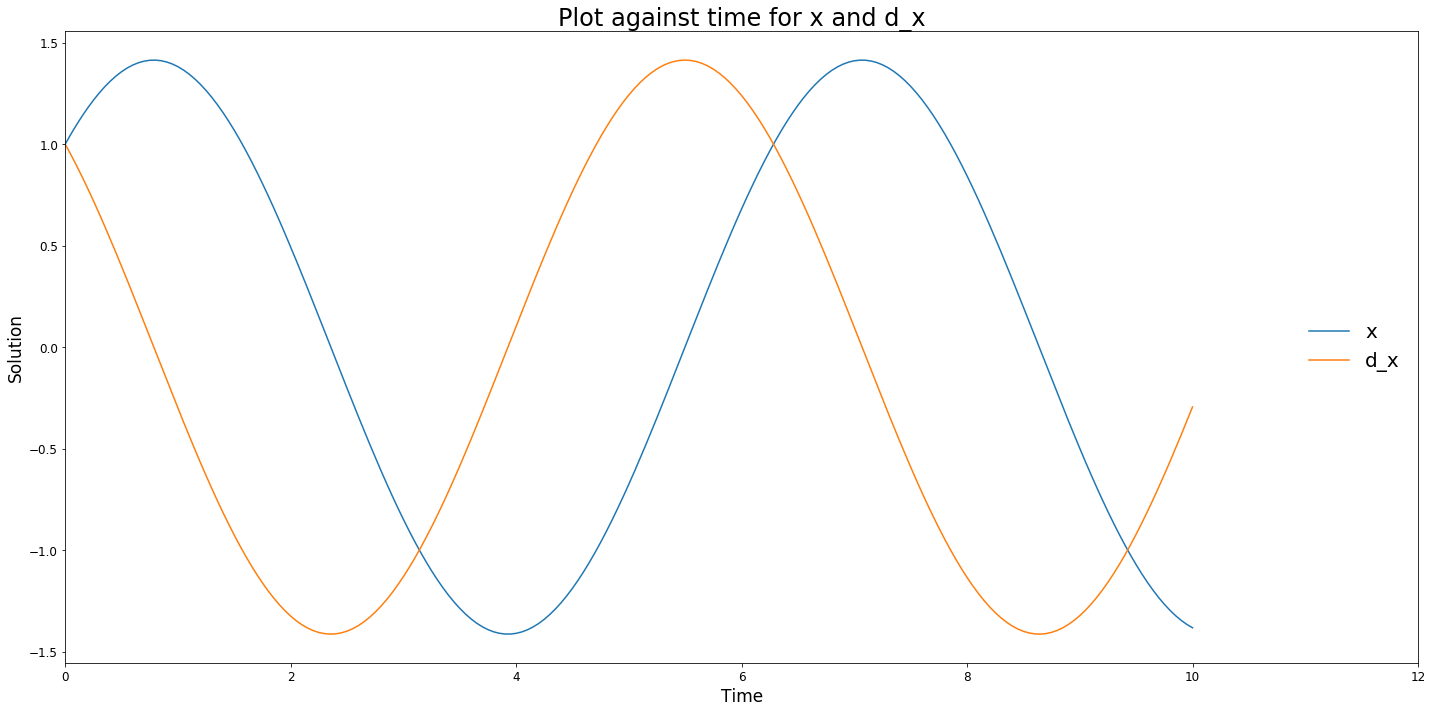

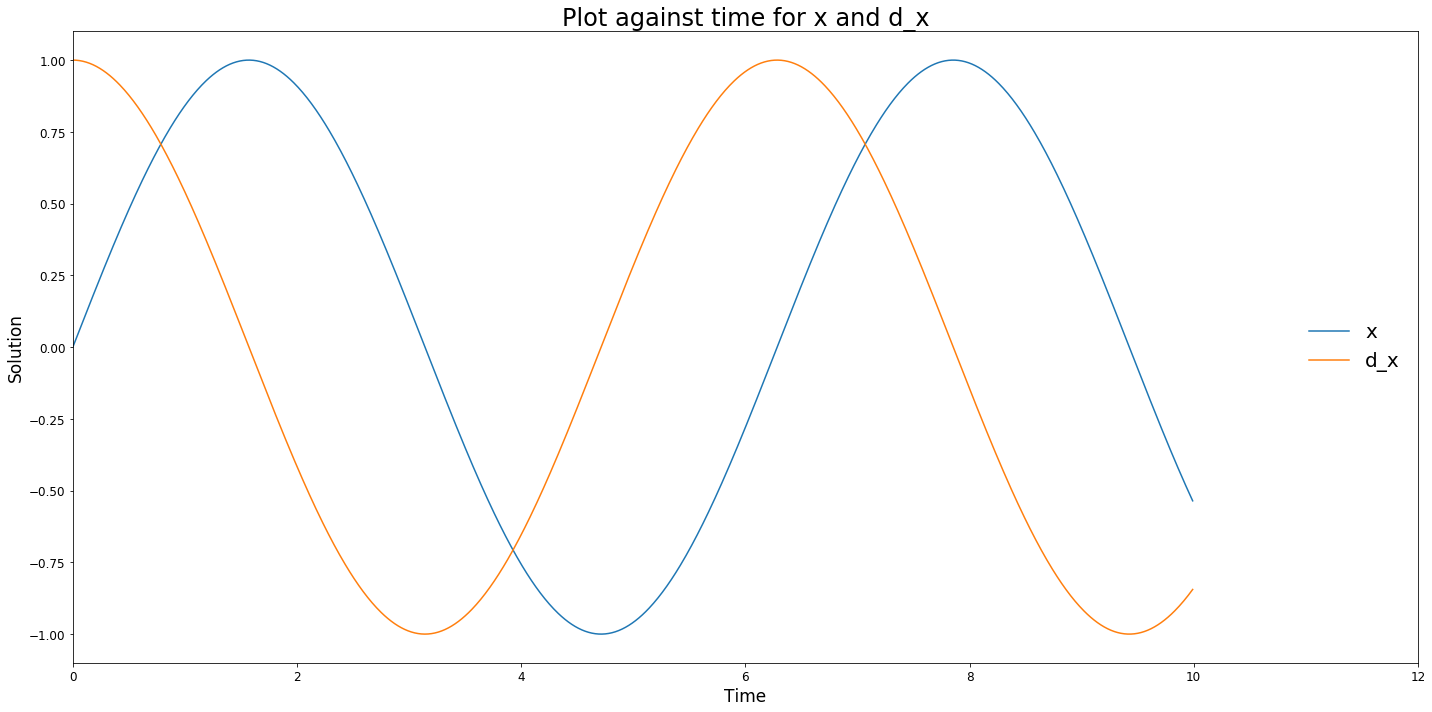

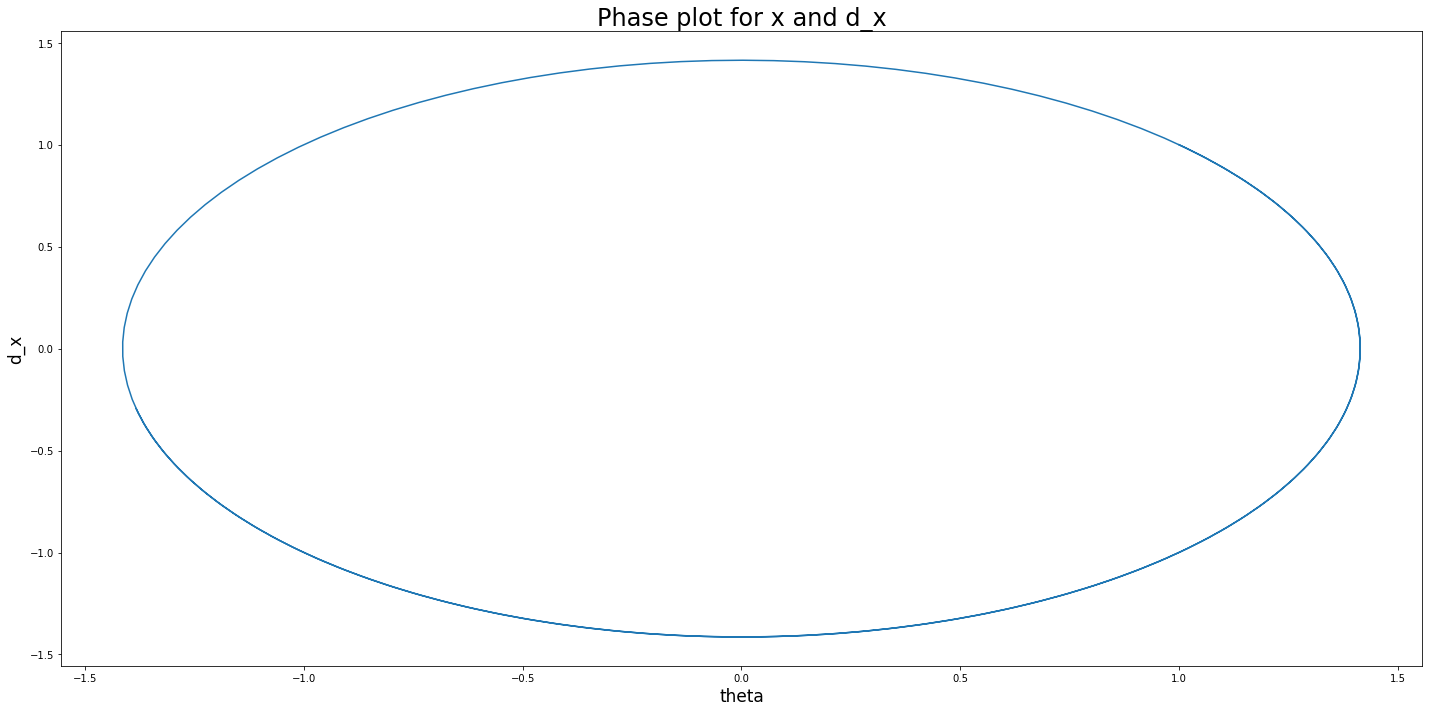

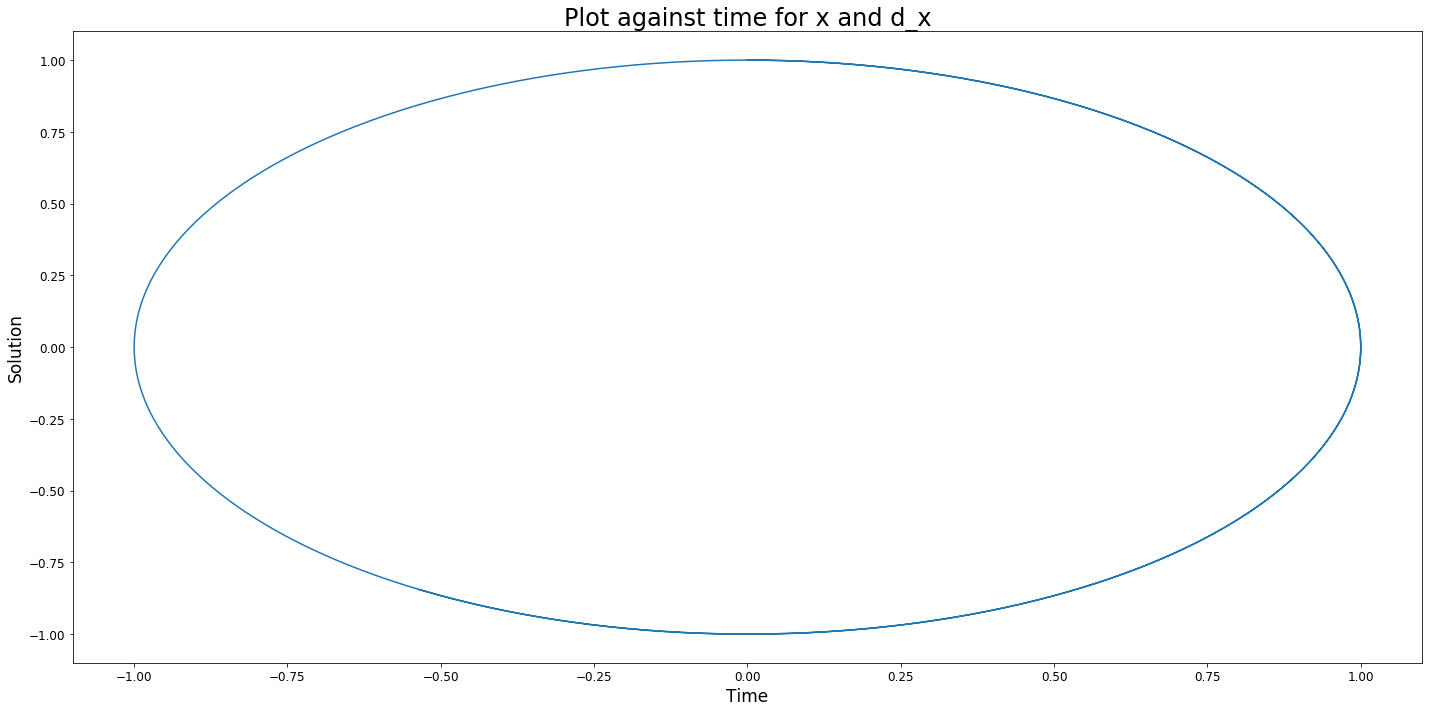

In [78]:
xs = np.transpose(tempSol.y)
ts = np.transpose(tempSol.t)

plt.figure(num=1,figsize=(20,10))
plt.plot(ts, xs[:,0],ts,xs[:,1])
plt.xlim(0, 12)
plt.legend(['x','d_x'], loc=5,fontsize=20,frameon=False)
plt.xlabel('Time', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel('Solution', fontsize=17)
plt.title("Plot against time for x and d_x",fontsize=24)
plt.tight_layout()
    
plt.figure(num=2,figsize=(20,10))
plt.plot(t, s, t, ds)
plt.xlim(0, 12)
plt.legend(['x','d_x'], loc=5,fontsize=20,frameon=False)
plt.xlabel('Time', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel('Solution', fontsize=17)
plt.title("Plot against time for x and d_x",fontsize=24)
plt.tight_layout()


plt.figure(num=3,figsize=(20,10))
plt.plot(xs[:,0], xs[:,1])
#plt.legend(["Posicion angular alpha"], loc=5,fontsize=20,frameon=False)
plt.xlabel('theta', fontsize=17)
plt.ylabel('d_x', fontsize=17)
plt.title("Phase plot for x and d_x",fontsize=24)
plt.tight_layout()
    
    
plt.figure(num=4,figsize=(20,10))
plt.plot(s, ds)
#plt.legend(['x','d_x'], loc=5,fontsize=20,frameon=False)
plt.xlabel('Time', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel('Solution', fontsize=17)
plt.title("Plot against time for x and d_x",fontsize=24)
plt.tight_layout()
